# Q3 Text Classification

## 3.1 RNN

In [10]:
#Text preprocessing:
import pandas as pd
from tensorflow import keras
import sklearn
from nltk.tokenize import word_tokenize


import re 

#Text preprocessing:
data = pd.read_csv('./twitter_data/tweets_with_labels.csv', sep='\t')
texts = []
for t in data['tweet']:
    tokens = word_tokenize(t)
    term =[]
    for to in tokens:
        if(re.fullmatch(r'[a-zA-Z]*',to) or re.fullmatch(r'[a-zA-Z]*\'[a-zA-z]*',to)): 
            term.append(to)
            
    text = ' '.join(term)
    texts.append(text)
data['texts'] = texts

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

x = data['texts']
y = data[['k1','k2','k3','k4','k5','k6','k7','k8','k9','k10','k11','k12','k13','k14','k15']]
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=16)

tokenizer = Tokenizer(100)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train) 
x_test = tokenizer.texts_to_sequences(x_test)
x_train = pad_sequences(x_train,maxlen=50)
x_test = pad_sequences(x_test,maxlen=50)



model = keras.Sequential()
model.add(keras.layers.Embedding(100,64))
model.add(keras.layers.SimpleRNN(64))
model.add(keras.layers.Dense(15, activation='softmax'))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
rnn_res =model.fit(x_train,y_train,epochs = 10,validation_data = (x_test, y_test), batch_size = 64,verbose=1)





Train on 54562 samples, validate on 23384 samples
Epoch 1/10
54562/54562 [==============================] - 19s 340us/step - loss: 1.8073 - accuracy: 0.6558 - val_loss: 1.5640 - val_accuracy: 0.7432
Epoch 2/10
54562/54562 [==============================] - 10s 184us/step - loss: 1.5155 - accuracy: 0.7508 - val_loss: 1.5075 - val_accuracy: 0.7562
Epoch 3/10
54562/54562 [==============================] - 10s 192us/step - loss: 1.4863 - accuracy: 0.7546 - val_loss: 1.4839 - val_accuracy: 0.7565
Epoch 4/10
54562/54562 [==============================] - 11s 202us/step - loss: 1.4671 - accuracy: 0.7574 - val_loss: 1.4737 - val_accuracy: 0.7557
Epoch 5/10
54562/54562 [==============================] - 11s 193us/step - loss: 1.4532 - accuracy: 0.7596 - val_loss: 1.4622 - val_accuracy: 0.7539
Epoch 6/10
54562/54562 [==============================] - 11s 194us/step - loss: 1.4443 - accuracy: 0.7601 - val_loss: 1.4591 - val_accuracy: 0.7571
Epoch 7/10
54562/54562 [==============================] 

## 3.2 CNN

In [44]:
model = keras.Sequential()
model.add(keras.layers.Embedding(100,128))
model.add(keras.layers.Conv1D(128, kernel_size = 3,padding='same',activation='relu',strides=1))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(15, activation='softmax'))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
cnn_res =model.fit(x_train,y_train,epochs = 10,validation_data = (x_test, y_test), batch_size = 64,verbose=1)


Train on 54562 samples, validate on 23384 samples
Epoch 1/10
54562/54562 [==============================] - 24s 440us/step - loss: 1.5424 - accuracy: 0.7315 - val_loss: 1.4269 - val_accuracy: 0.7691
Epoch 2/10
54562/54562 [==============================] - 19s 341us/step - loss: 1.4023 - accuracy: 0.7686 - val_loss: 1.4065 - val_accuracy: 0.7701
Epoch 3/10
54562/54562 [==============================] - 18s 336us/step - loss: 1.3798 - accuracy: 0.7705 - val_loss: 1.3970 - val_accuracy: 0.7677
Epoch 4/10
54562/54562 [==============================] - 18s 336us/step - loss: 1.3634 - accuracy: 0.7716 - val_loss: 1.3942 - val_accuracy: 0.7701
Epoch 5/10
54562/54562 [==============================] - 18s 332us/step - loss: 1.3469 - accuracy: 0.7744 - val_loss: 1.3937 - val_accuracy: 0.7682
Epoch 6/10
54562/54562 [==============================] - 18s 333us/step - loss: 1.3311 - accuracy: 0.7765 - val_loss: 1.3937 - val_accuracy: 0.7709
Epoch 7/10
54562/54562 [==============================] 

## 3.3 Compare and Plot

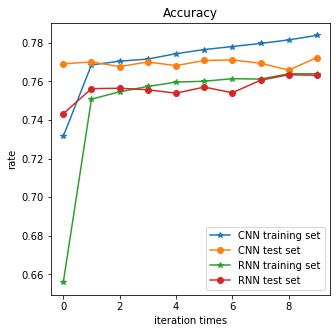

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Accuracy')
plt.plot(cnn_res.history['accuracy'], label='CNN training set',marker = '*')
plt.plot(cnn_res.history['val_accuracy'], label='CNN test set',marker = 'o')
plt.plot(rnn_res.history['accuracy'], label='RNN training set',marker = '*')
plt.plot(rnn_res.history['val_accuracy'], label='RNN test set',marker = 'o')
plt.legend(loc = 'lower right') 
  
plt.xlabel('iteration times')
plt.ylabel('rate')
plt.show()